In [30]:
# libraries
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import random
import pandas as pd
# import h5py

# import wave
# from scipy.io import wavfile

# import pyprep
# from pyprep.prep_pipeline import PrepPipeline


# # for permutation stats visualization
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from mne.viz import plot_compare_evokeds
import scipy
import pickle

# ICA check

Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/2_bad_channel_corrected/Yas_223_corr_prep.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_72926/1181533602.py:20: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/2_bad_channel_corrected/Yas_223_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


    Range : 0 ... 951749 =      0.000 ...  3806.996 secs
Ready.
Reading 0 ... 951749  =      0.000 ...  3806.996 secs...
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/3_ica/Yas_223_corr_prep_icaSolution.fif ...
Now restoring ICA solution ...
Ready.


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_72926/1181533602.py:21: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/3_ica/Yas_223_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica = mne.preprocessing.read_ica(ica_dir + file.split('.')[0] + '_icaSolution.fif')


Yas_223_corr_prep.fif

ICA000: brain - 0.6518
ICA001: eye blink - 0.9448
ICA002: brain - 0.9984
ICA003: brain - 0.9999
ICA004: brain - 0.9963
ICA005: brain - 0.9994
ICA006: brain - 0.9996
ICA007: brain - 0.9961
ICA008: brain - 0.9994
ICA009: brain - 0.9986
ICA010: brain - 0.9994
ICA011: brain - 0.9981
ICA012: brain - 0.9986
ICA013: muscle artifact - 0.997
ICA014: brain - 0.9694

[1, 13]


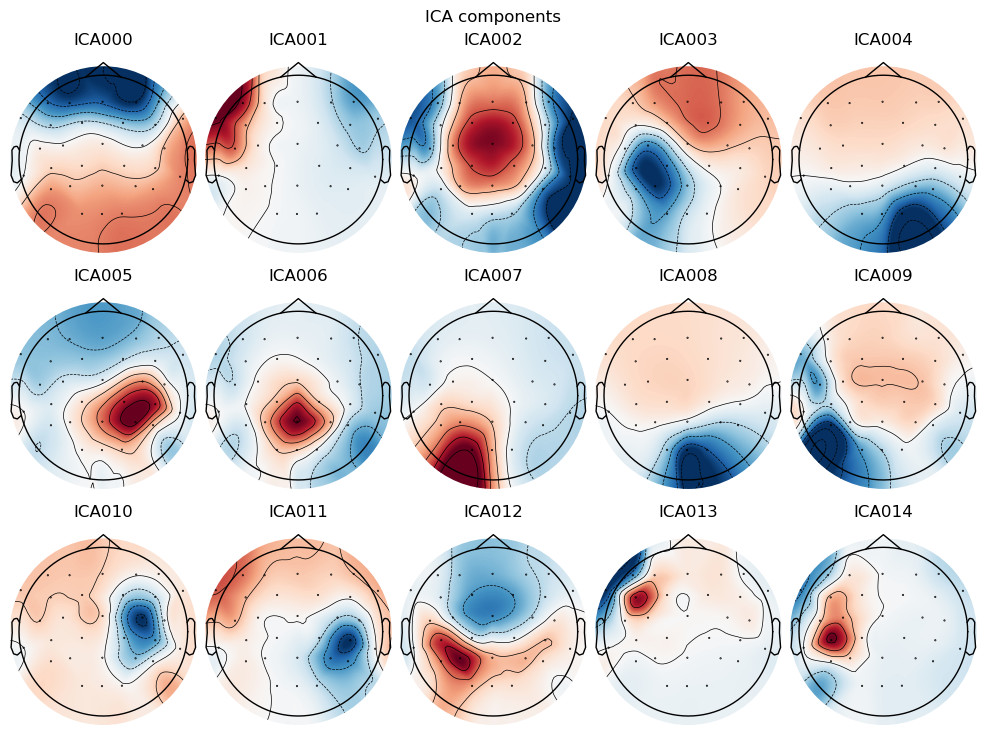

Creating RawArray with float64 data, n_channels=17, n_times=951750
    Range : 0 ... 951749 =      0.000 ...  3806.996 secs
Ready.


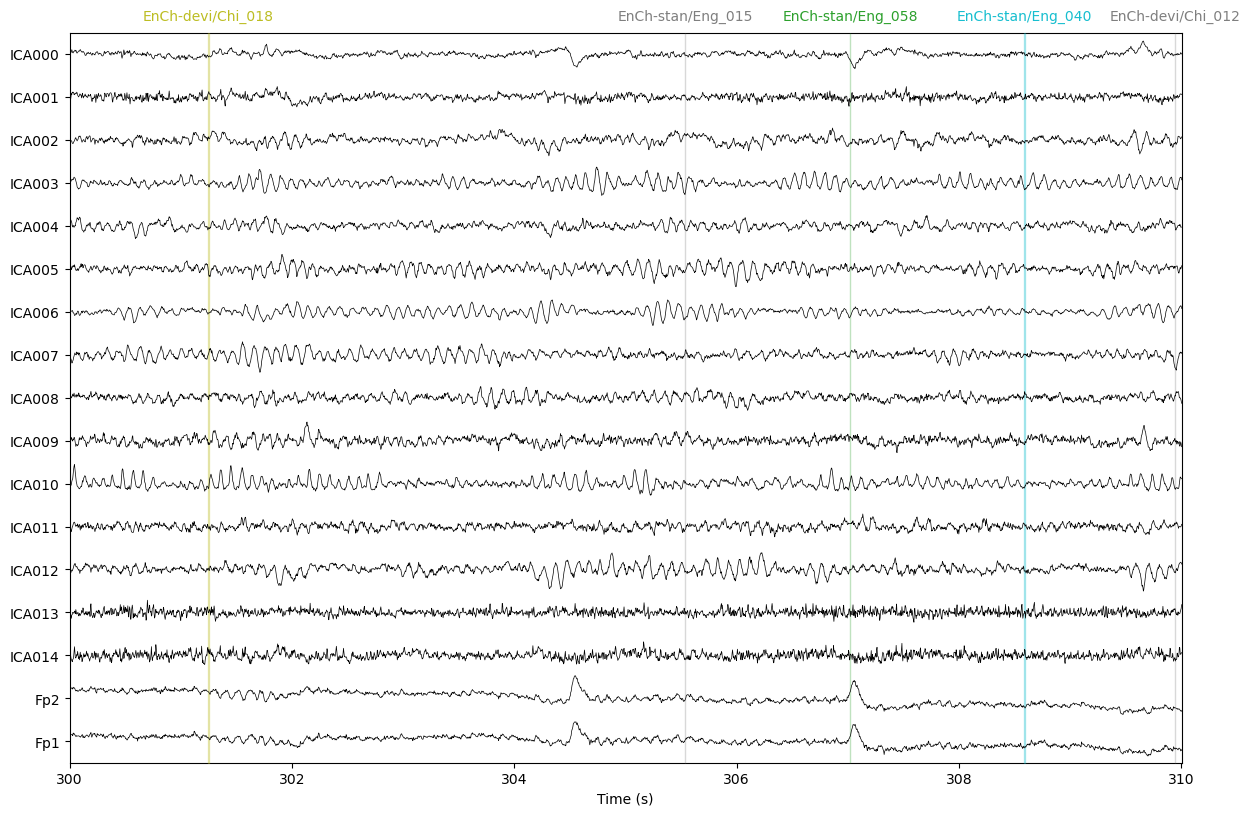

In [39]:
ppt = '223'

# set working directory
work_dir = '/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/'

# directory
input_dir = work_dir + 'data_preprocessed/2_bad_channel_corrected/'
ica_dir = work_dir + 'data_preprocessed/3_ica/'

# create a folder if the folder doesn't exist
# os.makedirs(output_dir, exist_ok=True)


# up to which IC you want to consider
ic_upto = 15

file = 'Yas_' + ppt + '_corr_prep.fif'

# read in ica solution
raw = mne.io.read_raw_fif(input_dir + file, preload=True)
ica = mne.preprocessing.read_ica(ica_dir + file.split('.')[0] + '_icaSolution.fif')

# read in ic_labels
with open(ica_dir + file.split('.')[0]+ '_icLabels.pickle', 'rb') as f:
    ic_labels = pickle.load(f)
    
# extract labels and probabilities
labels = ic_labels["labels"]
probs = ic_labels['y_pred_proba']

# print the file name
print(file)
print()

# get the label and probability of ICs
for idx in range(ic_upto):
    print( 'ICA' + f"{idx:03}" + ': ' + labels[idx] + ' - ' + str(round(probs[idx], ndigits=4)) )
print()

#### auto select brain AND other ####
labels = ic_labels["labels"]
exclude_idx = [
    idx for idx, label in enumerate(labels) if idx<ic_upto and label not in ["brain", "other"]
]
print(exclude_idx)


# plot topos
ica.plot_components(picks=range(ic_upto))
plt.show()


# Continuous waveforms for components.
ica.plot_sources(raw,
                 picks = range(ic_upto),
                 start = 300, stop = 310,
                 show_scrollbars=False,
                )
plt.show()

# check again

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1823 matching events found
No baseline correction appl

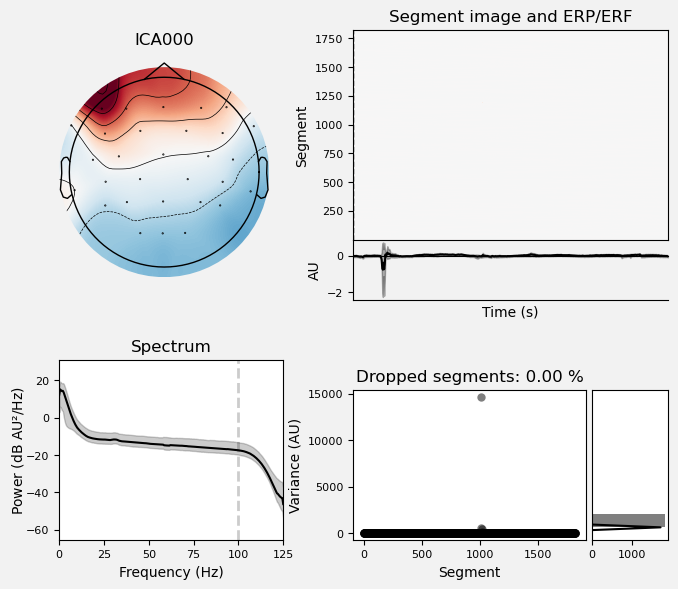

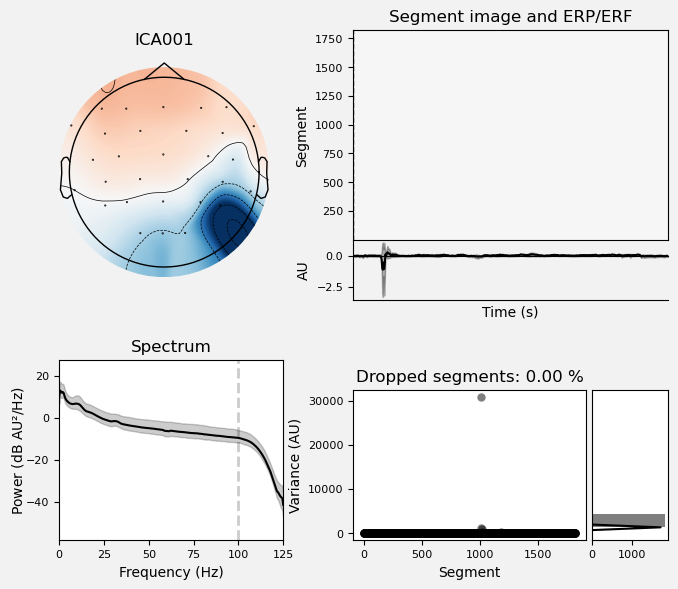

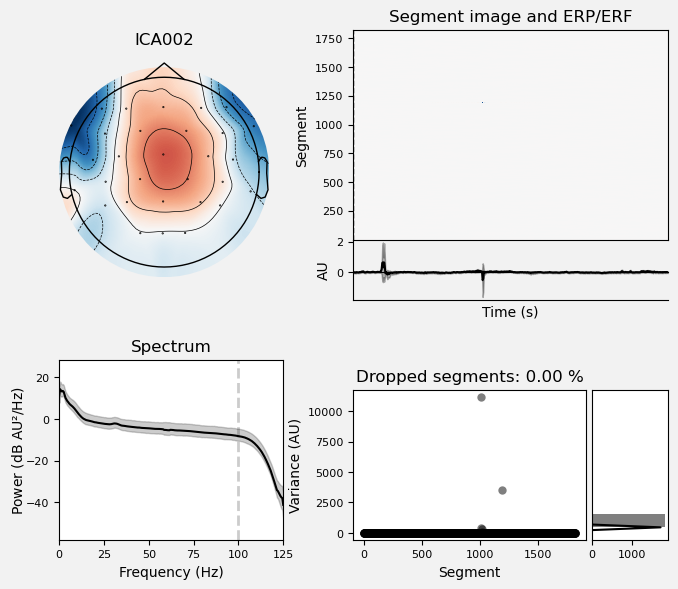

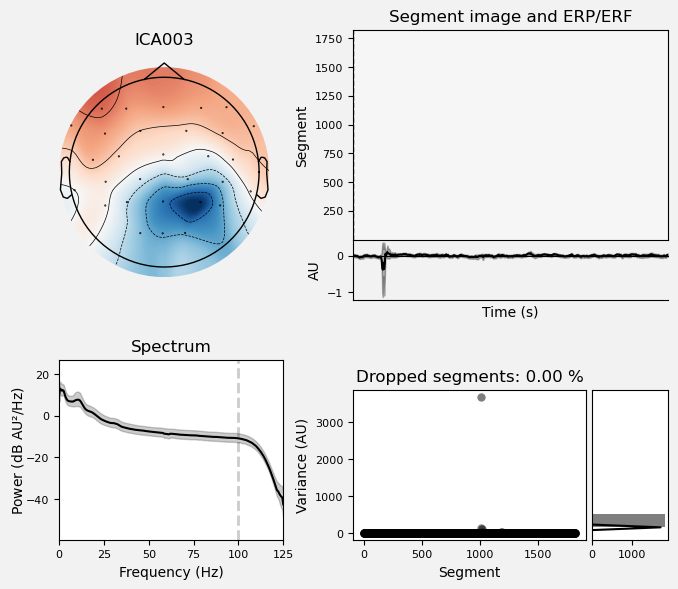

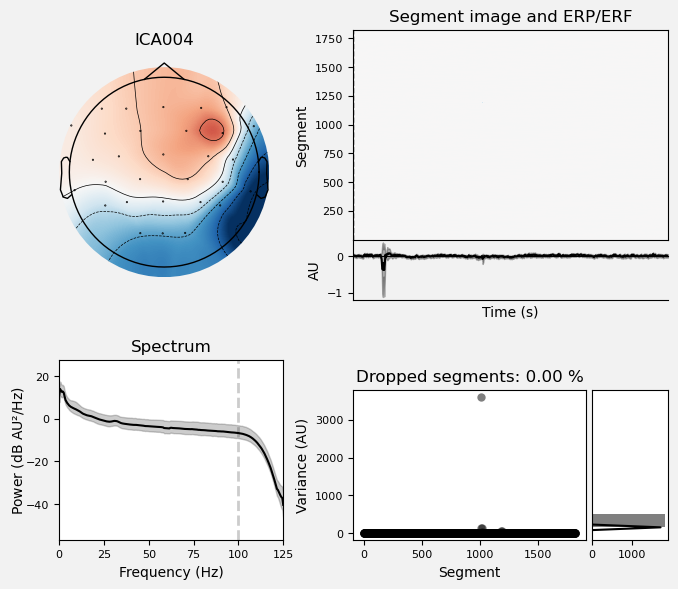

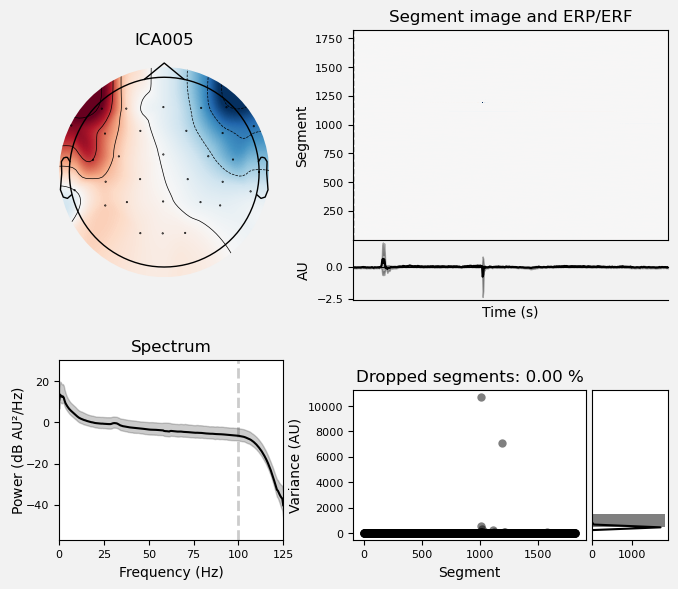

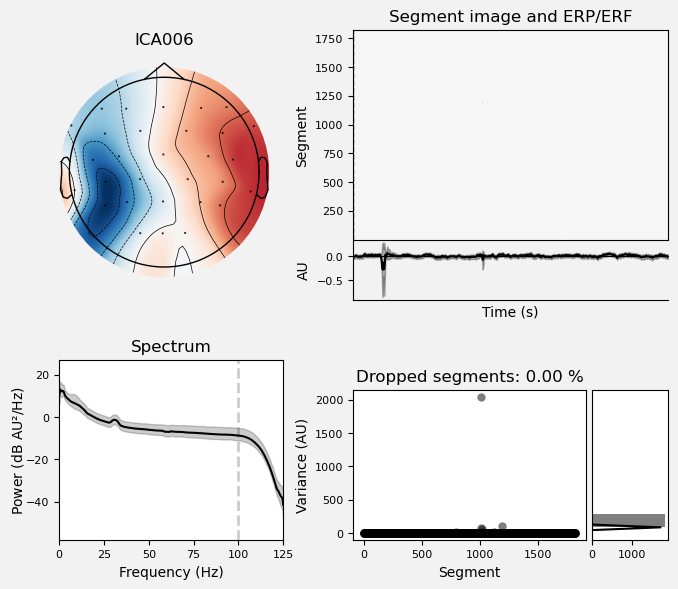

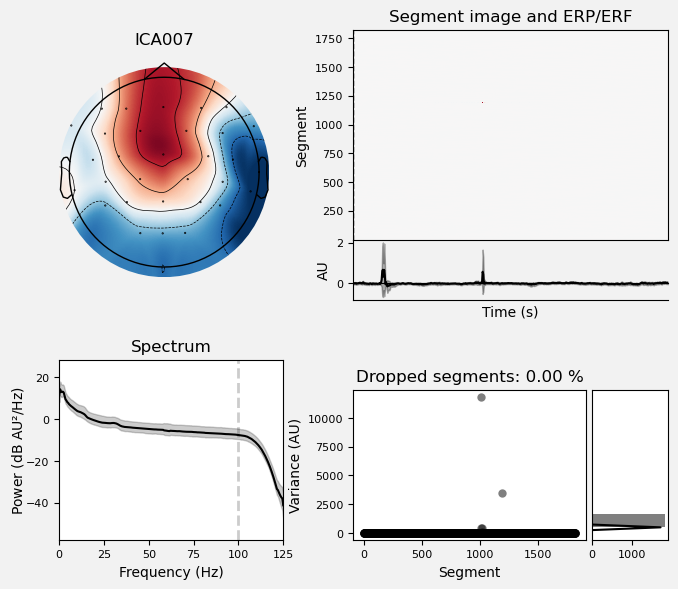

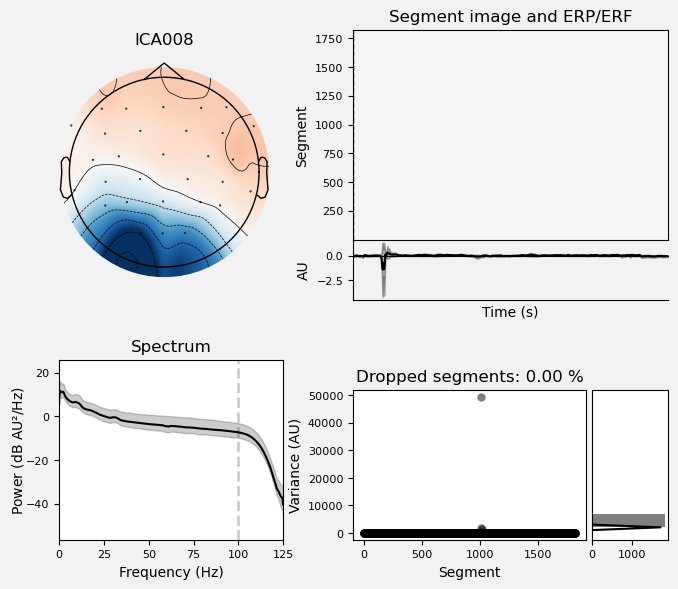

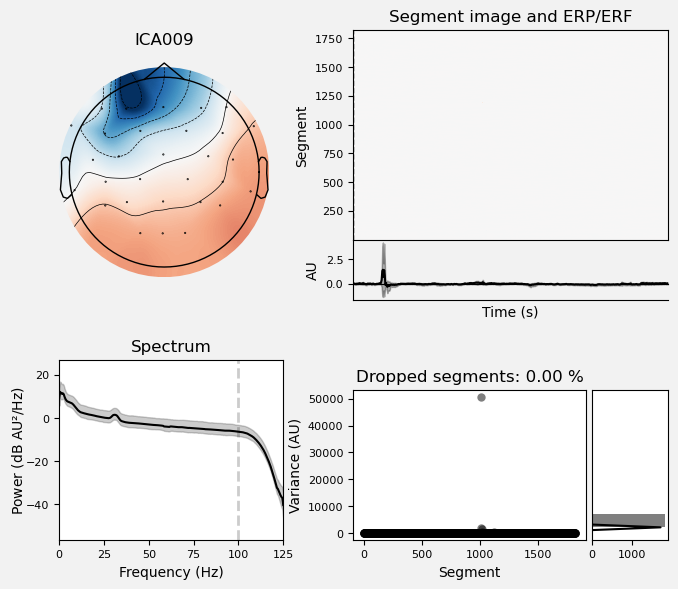

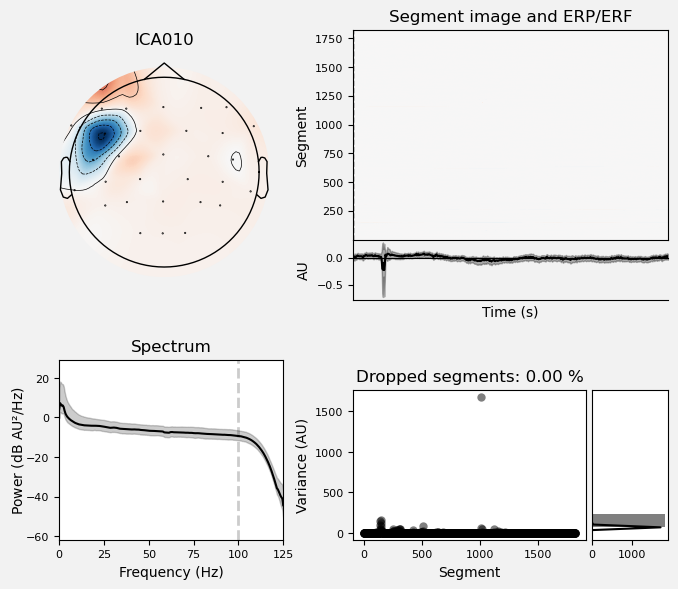

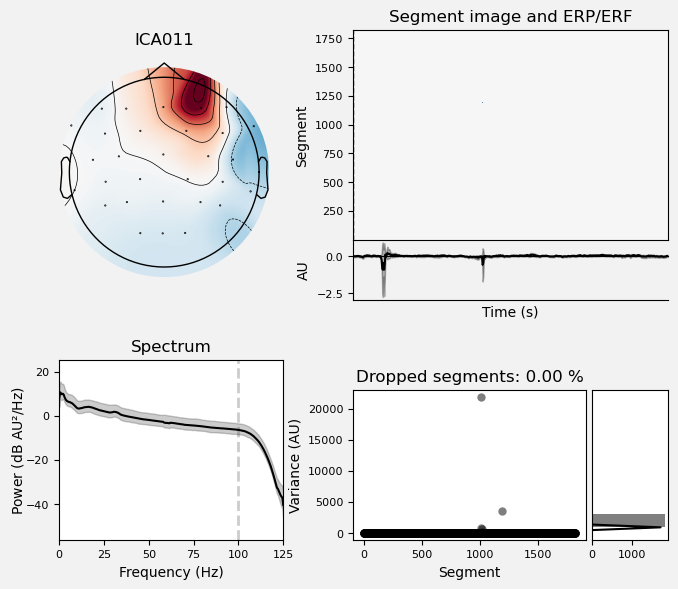

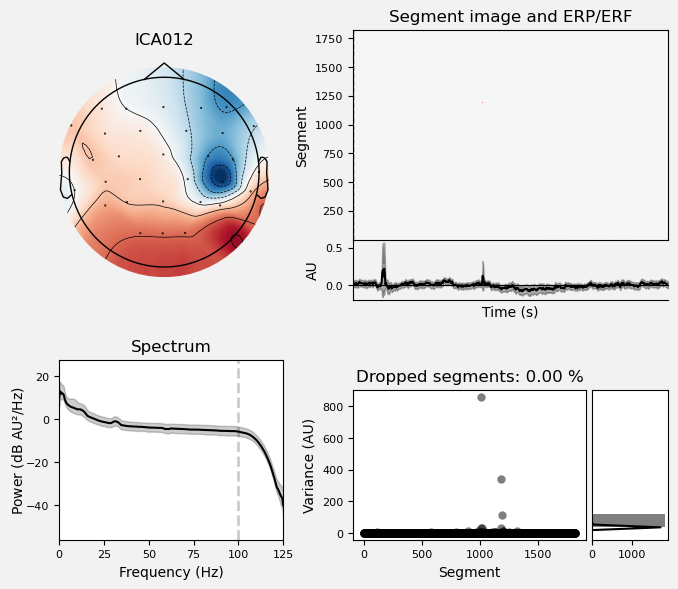

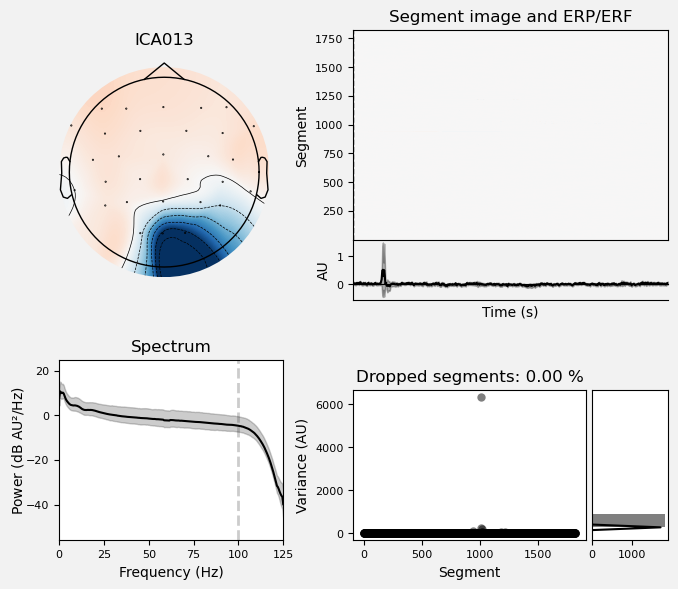

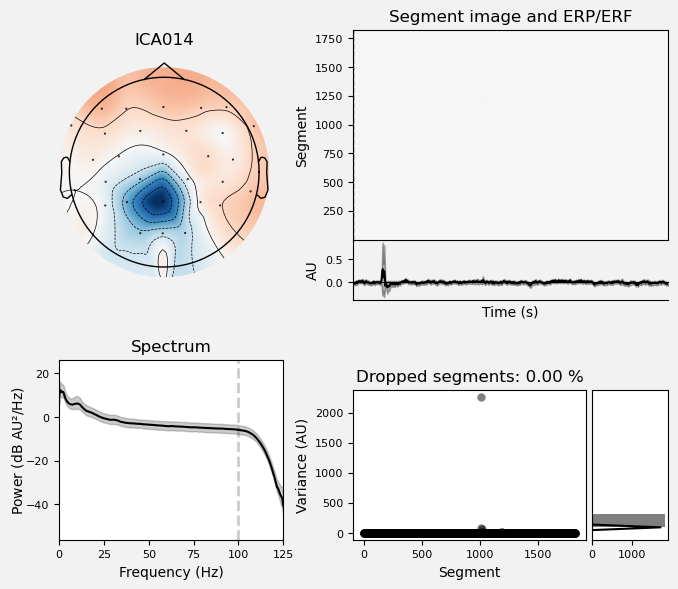

In [33]:
# further diagnosis
ica.plot_properties(raw, picks=range(0,15))
plt.show()

# IC to exclude

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components


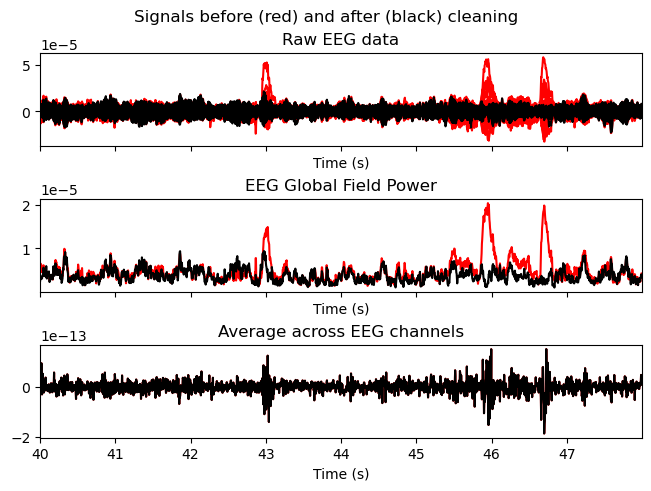

Applying ICA to Raw instance
    Transforming to ICA space (25 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


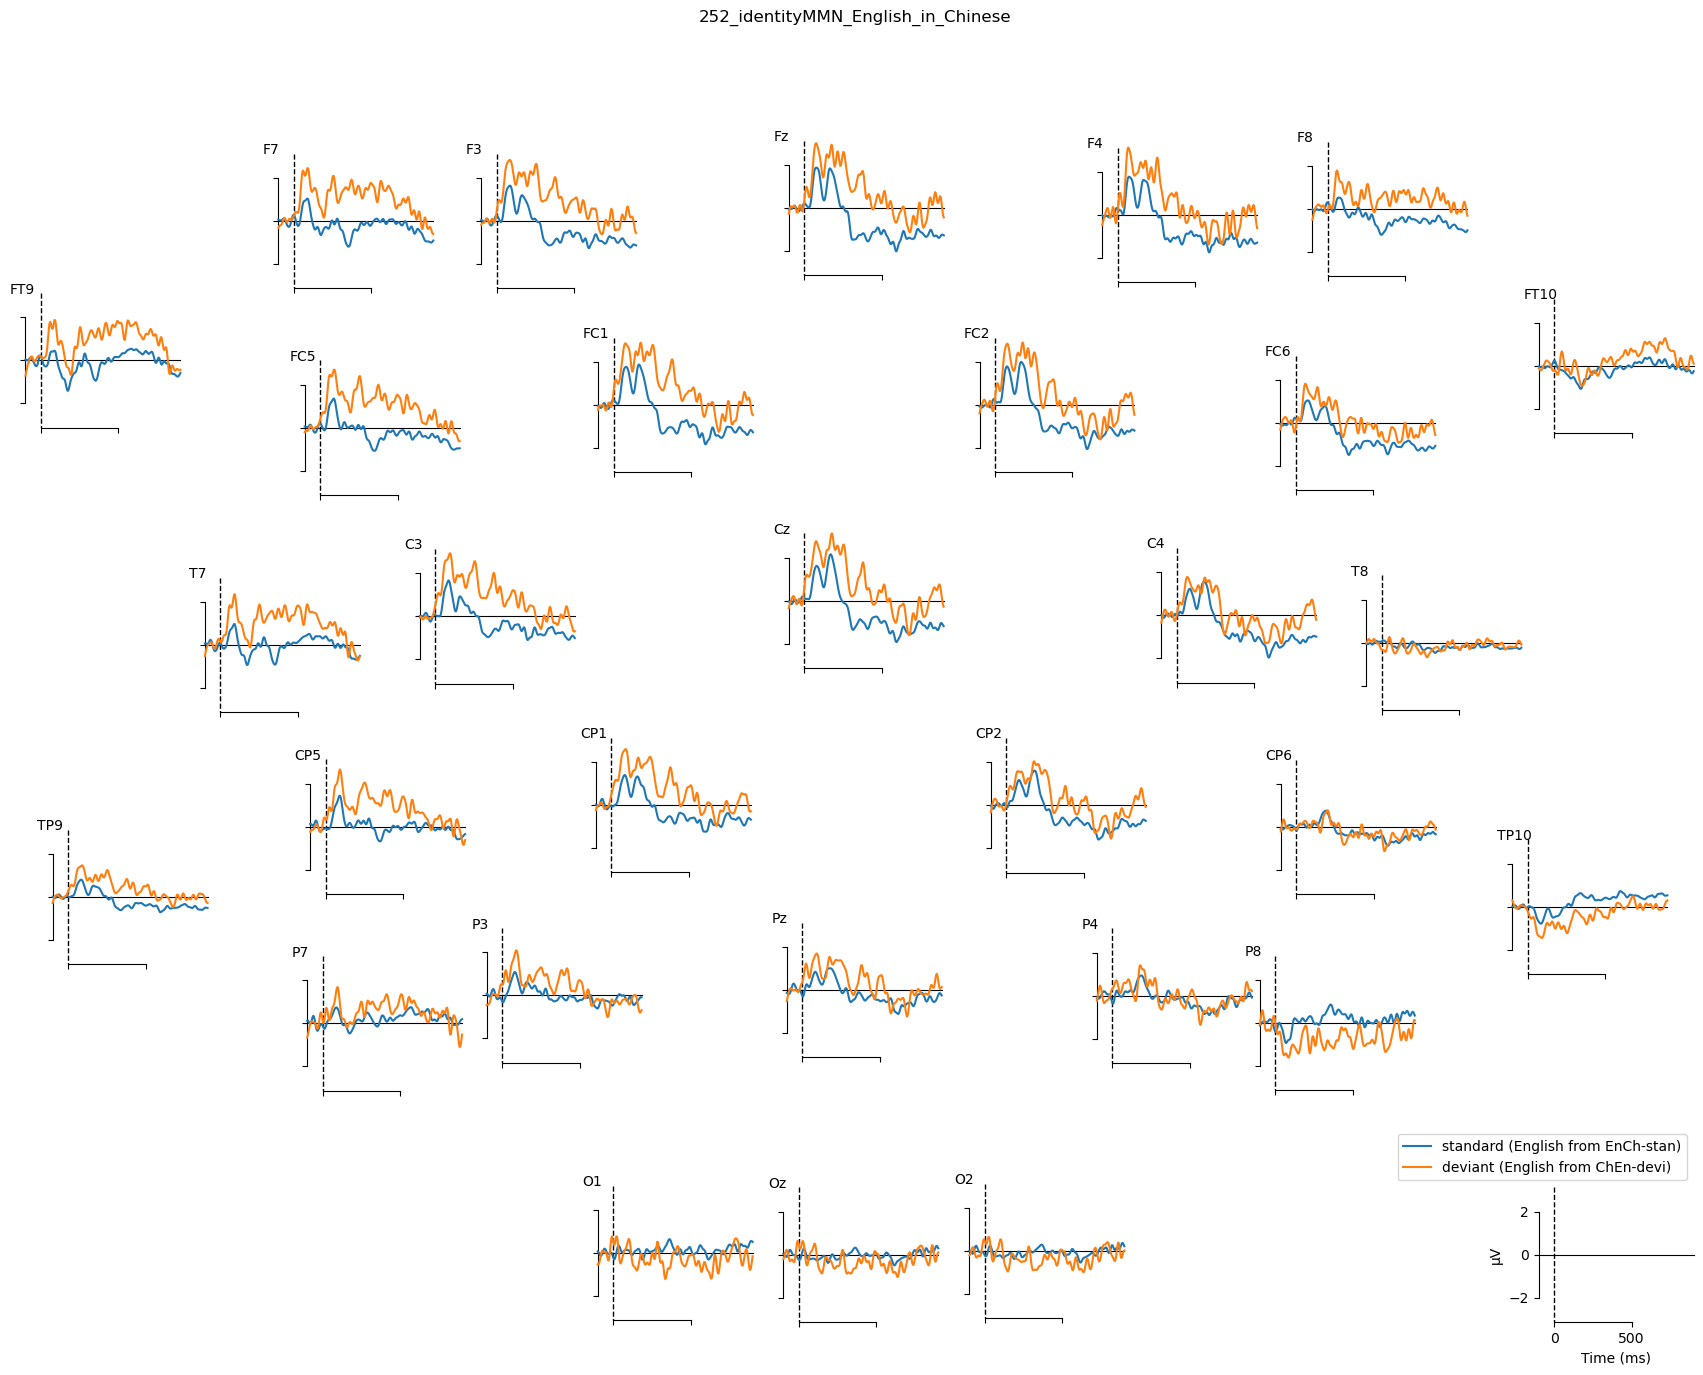

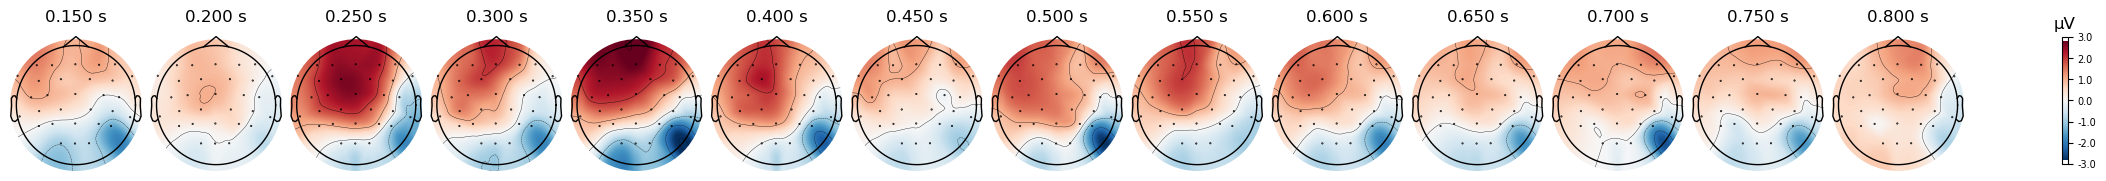

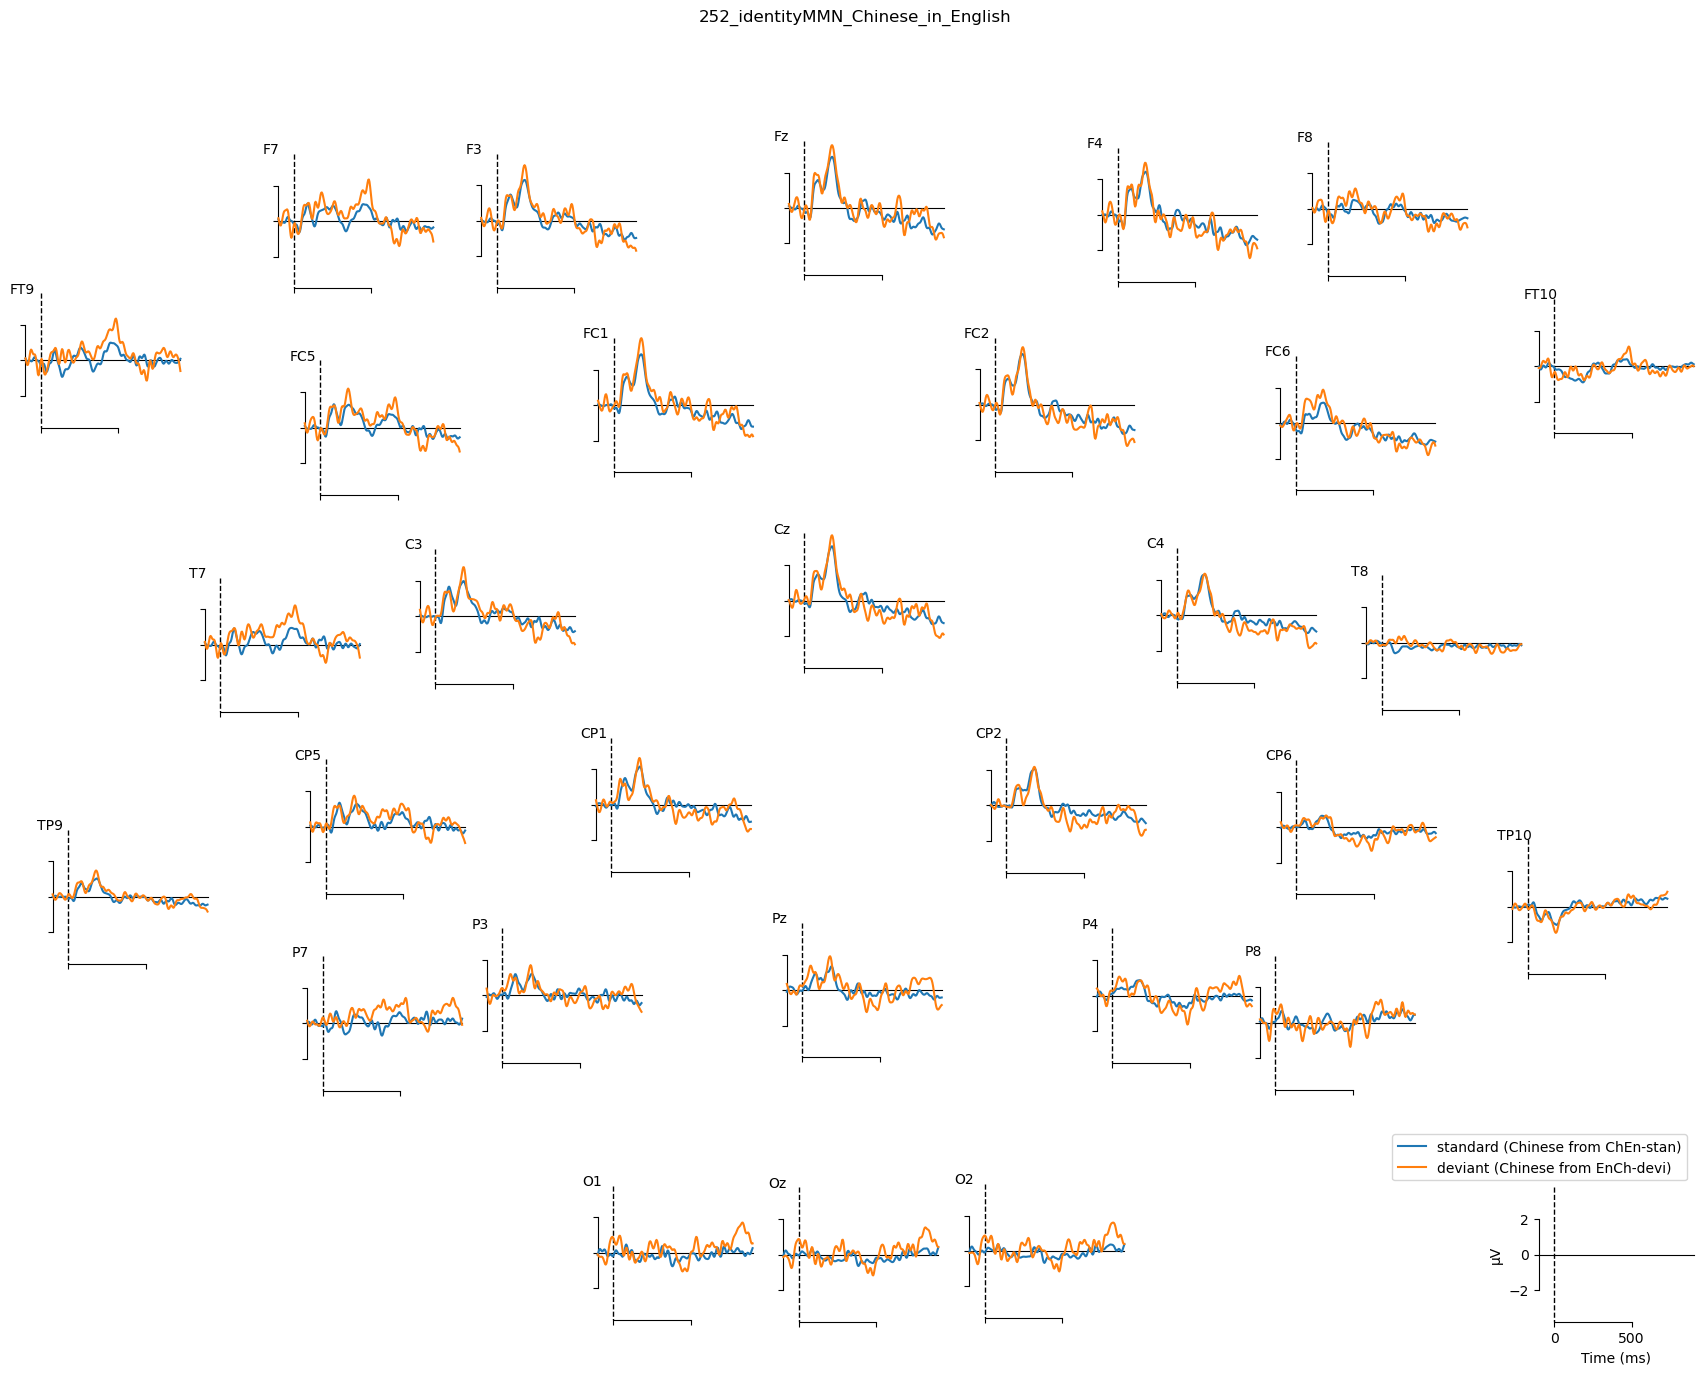

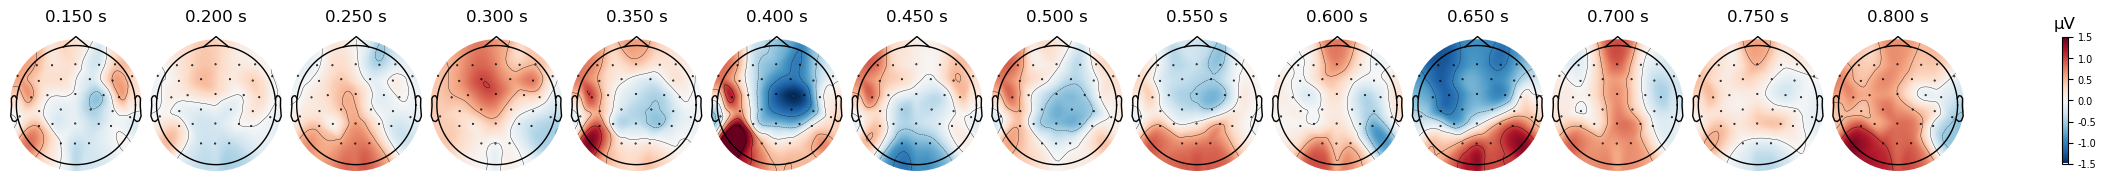

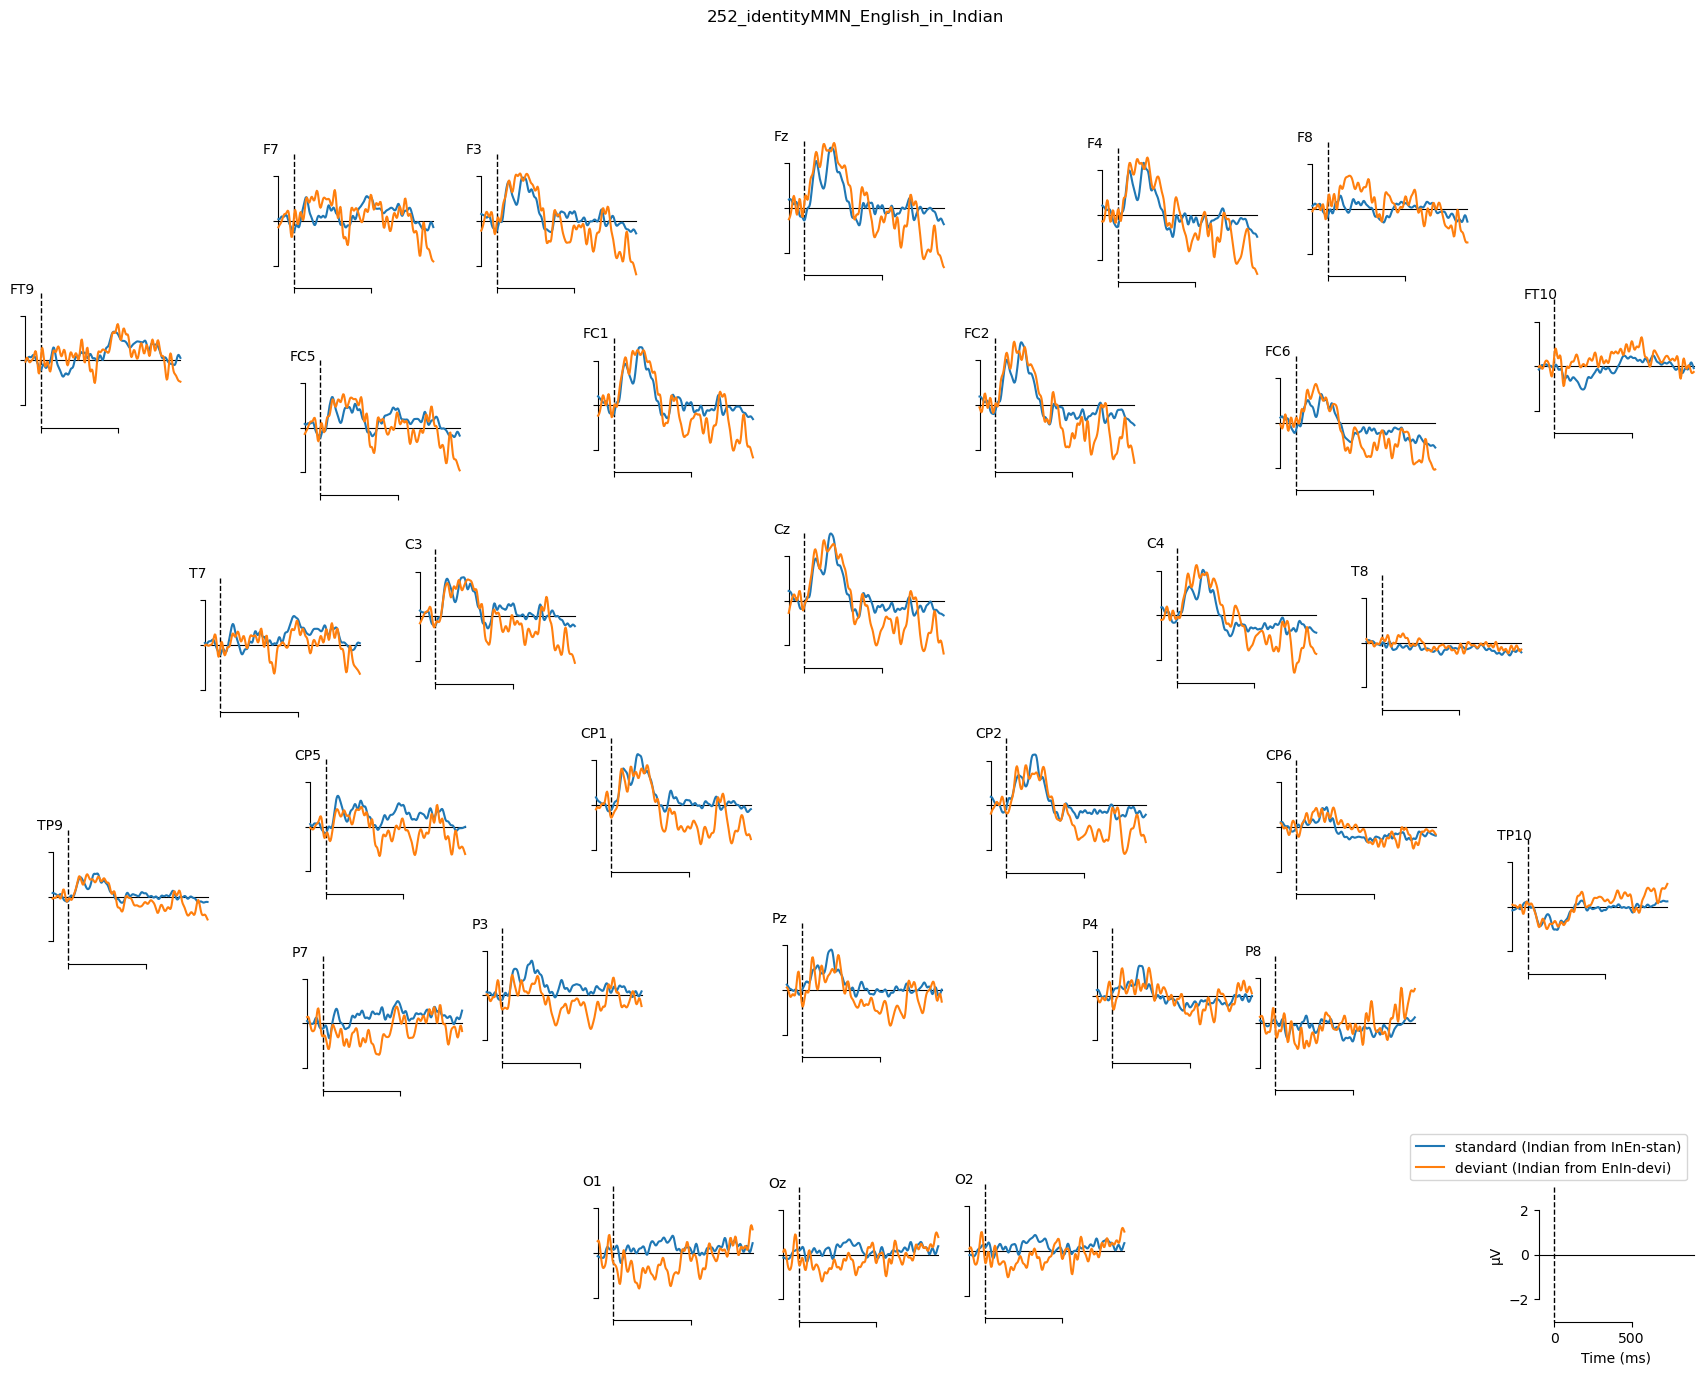

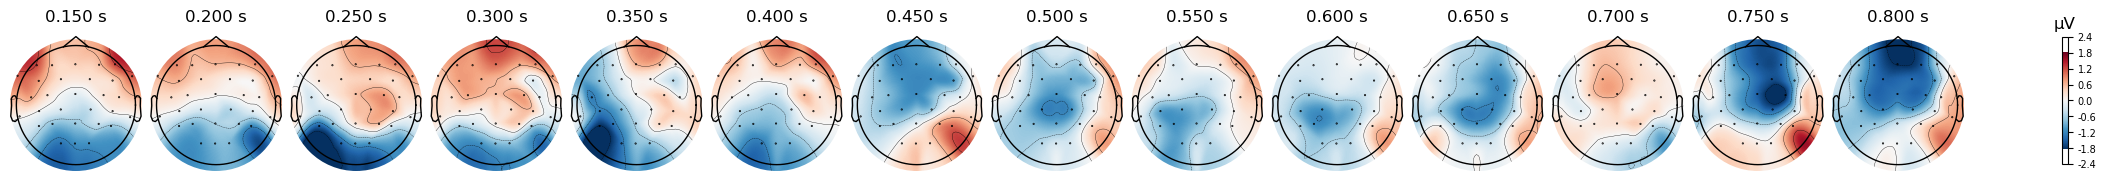

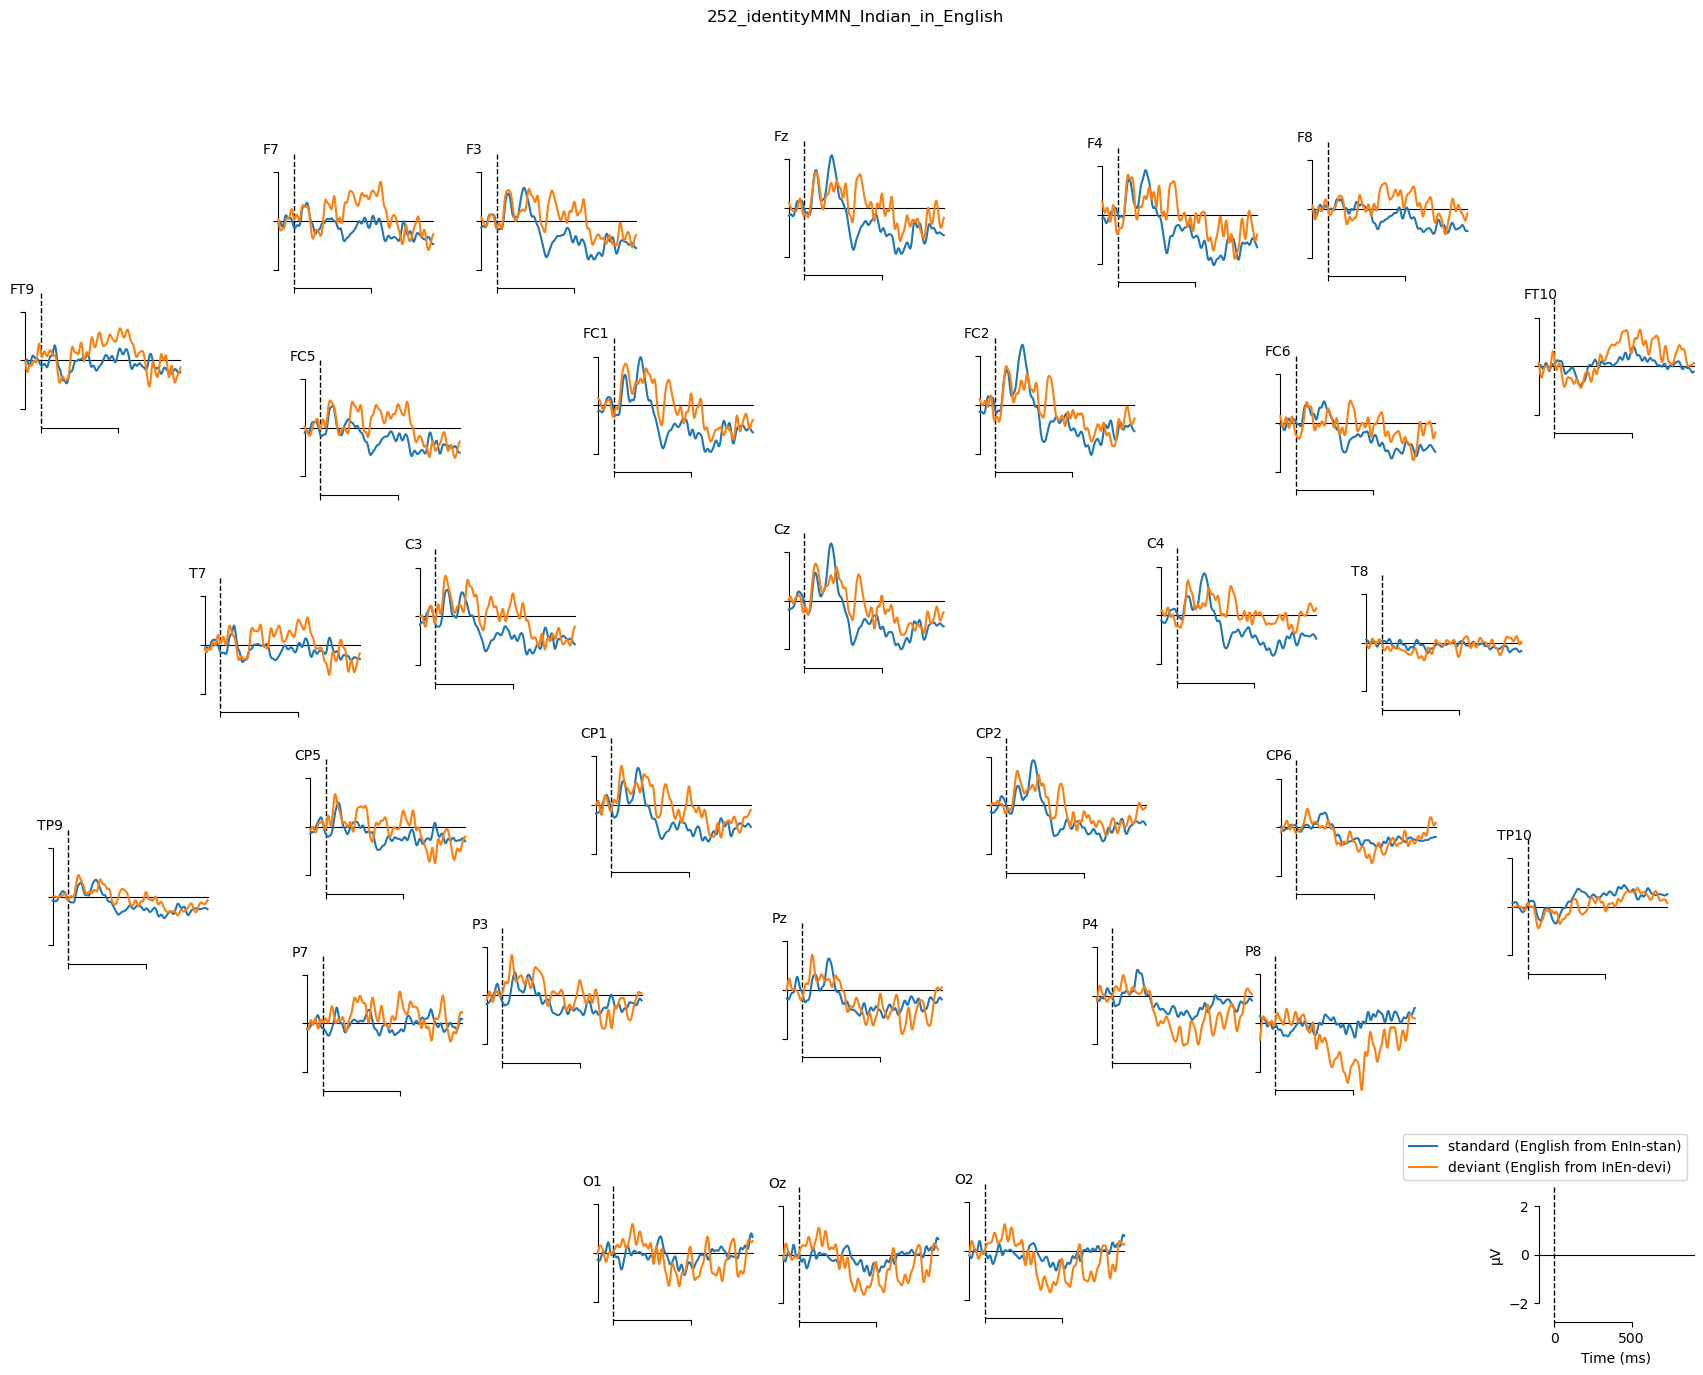

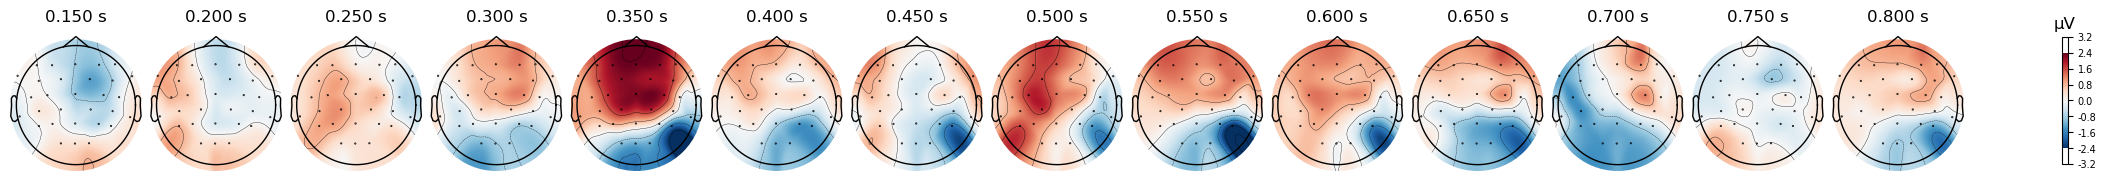

In [35]:
# manually enter ICs to exclude
exclude_idx = [0, 5, 9, 10]


# compare waveforms before vs after removing components
ica.plot_overlay(
    raw, exclude=exclude_idx,
    start=10000, stop=12000
)
plt.show()


# waveform plotting
# ica.apply() changes the Raw object in-place
# manually enter ICs to exclude
raw_new = raw.copy()
ica.apply(raw_new, exclude=exclude_idx)


# epoch
# Epoch window: 
erp_t_start = -0.1; erp_t_end = 0.9 # ERP: -100 ~ 700 ms

# criteria to reject epoch
reject_criteria = dict(eeg = 100e-6)       # 100 µV
# reject_criteria = dict(eeg = 150e-6)       # 150 µV
# reject_criteria = dict(eeg = 200e-6)       # 200 µV

# average-mastoids re-reference
raw_new.set_eeg_reference(ref_channels = ['TP9', 'TP10'])

#### this is for source calculation ####
# filter the data, optional
# raw = raw.filter(l_freq=None, h_freq=30) 

# sphere = mne.make_sphere_model('auto', 'auto', raw.info)
# src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15.)
# forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere)
# raw = raw.set_eeg_reference('REST', forward=forward)
########################################

# get event info for segmentation
events_from_annot, event_dict = mne.events_from_annotations(raw_new, verbose='WARNING')

# segmentation for ERP
epochs = mne.Epochs(
    raw_new,
    events = events_from_annot, event_id = event_dict,
    tmin = erp_t_start, tmax = erp_t_end,
    # apply baseline correction
    baseline = None,
    # remove epochs that meet the rejection criteria
    reject = reject_criteria,
    preload = True,
    verbose='WARNING'
)


# evokeds

# condition list
cond_list = [
    'ChEn-devi', 
    'ChEn-stan', 
    'EnCh-devi', 
    'EnCh-stan', 
    'EnIn-devi', 
    'EnIn-stan', 
    'InEn-devi', 
    'InEn-stan'
]

erp_baseline = (-0.1, 0)


# get erp for each condition
evoked_list = []
for cond in cond_list:
    
    # average | get ERP for each condition
    evoked = epochs[cond].average(by_event_type=False)

    # add condition label
    evoked.comment = cond

    # apply baseline
    evoked.apply_baseline(baseline=erp_baseline)

    # append
    evoked_list.append(evoked)


# plotting

# times to show in topoplots (in seconds)
times = [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

# choose a channel(s) for ERP plot


# create a dictionary for condition key and standard and deviant cells ####
mmn_dict = {
    # 'withinBlockMMN_English_in_Chinese': {'devi': 'ChEn-devi', 'stan': 'ChEn-stan',  'devi_stim': 'English', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Chinese_in_English': {'devi': 'EnCh-devi', 'stan': 'EnCh-stan',  'devi_stim': 'Chinese', 'stan_stim': 'English'},
    'identityMMN_English_in_Chinese': {'devi': 'ChEn-devi', 'stan': 'EnCh-stan',     'devi_stim': 'English', 'stan_stim': 'English'},
    'identityMMN_Chinese_in_English': {'devi': 'EnCh-devi', 'stan': 'ChEn-stan',     'devi_stim': 'Chinese', 'stan_stim': 'Chinese'},
    # 'withinBlockMMN_Indian_in_English': {'devi': 'EnIn-devi', 'stan': 'EnIn-stan',   'devi_stim': 'Indian', 'stan_stim': 'English'},
    # 'withinBlockMMN_English_in_Indian': {'devi': 'InEn-devi', 'stan': 'InEn-stan',   'devi_stim': 'English', 'stan_stim': 'Indian'},
    'identityMMN_English_in_Indian': {'devi': 'EnIn-devi', 'stan': 'InEn-stan',      'devi_stim': 'Indian', 'stan_stim': 'Indian'},
    'identityMMN_Indian_in_English': {'devi': 'InEn-devi', 'stan': 'EnIn-stan',      'devi_stim': 'English', 'stan_stim': 'English'},
}


for mmn in mmn_dict.keys():
    
    # single-subject, single-condition butterfly
    erp_stan = [x for x in evoked_list if x.comment==mmn_dict[mmn]['stan']][0]
    erp_devi = [x for x in evoked_list if x.comment==mmn_dict[mmn]['devi']][0]
    erp_diff = mne.combine_evoked([erp_devi, erp_stan], weights=[1,-1])
    
    # get legends
    legend_stan = 'standard (' + mmn_dict[mmn]['stan_stim'] + ' from ' + mmn_dict[mmn]['stan'] + ')'
    legend_devi = 'deviant (' + mmn_dict[mmn]['devi_stim'] + ' from ' + mmn_dict[mmn]['devi'] + ')'
    legend_diff = 'deviants minus standards'
    
    # # colors
    # color_devi = "crimson"
    # color_stan = "steelblue"
    # color_diff = 'black'
    
    
    ##########################
    ####  ERP Topographical subplot and ROI waveforms ####
    ##########################
    
    
    # combine data for plotting
    evokeds = {}
    evokeds[legend_stan] = erp_stan.filter(l_freq=None, h_freq=30, verbose='WARNING')
    evokeds[legend_devi] = erp_devi.filter(l_freq=None, h_freq=30, verbose='WARNING')
    # evokeds[legend_diff] = erp_diff.filter(l_freq=None, h_freq=30)
    
    
    ################################
    #### Topographical subplots ####
    ################################
    
    
    # figure title for the waveform
    title = ppt + '_' + mmn

    
    ##############################
    # waveforms across scalp topo
    # NOTE: I don't know how to save these plots using the code
    fig = mne.viz.plot_compare_evokeds(
        evokeds,
        axes='topo',
        # picks=pick_chans,
        # combine="mean",
        show_sensors=True,
        # colors=colors,
        title = title,
        # ylim=dict(eeg=[-5, 5]),
        time_unit="ms",
        show=False,
    );
    # figure title for the waveform    
    ##############################
    # waveforms across scalp topo
    # NOTE: I don't know how to save these plots using the code

    erp_diff.filter(l_freq=None, h_freq=30, verbose='WARNING').plot_topomap(times)

# save

In [29]:
# ica.apply() changes the Raw object in-place
# manually enter ICs to exclude
raw_new = raw.copy()
ica.apply(raw_new, exclude=exclude_idx)

# save data after ICA
raw_new.save(work_dir + 'data_preprocessed/3_ica/' + file.split('.')[0]+ '_ica.fif', overwrite=True)

# record the bad ICs in bad_ICs.txt
with open(work_dir + 'data_preprocessed/3_ica/bad_ICs.txt', 'a+') as f:
    _ = f.write(file + '\t' + str(exclude_idx) + '\n')

# epoch
# Epoch window: 
erp_t_start = -0.1; erp_t_end = 0.9 # ERP: -100 ~ 700 ms

# criteria to reject epoch
reject_criteria = dict(eeg = 100e-6)       # 100 µV
# reject_criteria = dict(eeg = 150e-6)       # 150 µV
# reject_criteria = dict(eeg = 200e-6)       # 200 µV

# average-mastoids re-reference
raw_new.set_eeg_reference(ref_channels = ['TP9', 'TP10'])

#### this is for source calculation ####
# filter the data, optional
# raw = raw.filter(l_freq=None, h_freq=30) 

# sphere = mne.make_sphere_model('auto', 'auto', raw.info)
# src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15.)
# forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere)
# raw = raw.set_eeg_reference('REST', forward=forward)
########################################

# get event info for segmentation
events_from_annot, event_dict = mne.events_from_annotations(raw_new, verbose='WARNING')

# segmentation for ERP
epochs = mne.Epochs(
    raw_new,
    events = events_from_annot, event_id = event_dict,
    tmin = erp_t_start, tmax = erp_t_end,
    # apply baseline correction
    baseline = None,
    # remove epochs that meet the rejection criteria
    reject = reject_criteria,
    preload = True,
    verbose='WARNING'
)

# remove 0 trial events, record info, and check if a subject is bad
for k, v in event_dict.items():

    # good trial count
    trial_count = len(epochs[k])

    # remove 0 trial event
    if trial_count==0:
        del epochs.event_id[k]

    # good trial rate
    goodTrial_rate = round( trial_count/sum(events_from_annot[:,2]==v), 2 )
    
    # record epoch summary
    with open(work_dir + 'data_preprocessed/4_epochs/epoch_summary.txt', 'a+') as f:
        _ =f.write(file.split('_')[1] + '\t' + k + '\t' + str(trial_count) + '\t' + str(goodTrial_rate) + '\n')

# save single participant file
epochs.save(work_dir + 'data_preprocessed/4_epochs/' + file.split('.')[0] + '_epo.fif',
           overwrite=True)


# evokeds

# condition list
cond_list = [
    'ChEn-devi', 
    'ChEn-stan', 
    'EnCh-devi', 
    'EnCh-stan', 
    'EnIn-devi', 
    'EnIn-stan', 
    'InEn-devi', 
    'InEn-stan'
]

erp_baseline = (-0.1, 0)


# get erp for each condition
evoked_list = []
for cond in cond_list:
    
    # average | get ERP for each condition
    evoked = epochs[cond].average(by_event_type=False)

    # add condition label
    evoked.comment = cond

    # apply baseline
    evoked.apply_baseline(baseline=erp_baseline)

    # append
    evoked_list.append(evoked)

# save
mne.write_evokeds(work_dir + 'data_preprocessed/5_evokeds/' + ppt + '_ave.fif', evoked_list, overwrite=True)

Applying ICA to Raw instance
    Transforming to ICA space (23 components)
    Zeroing out 5 ICA components
    Projecting back using 30 PCA components
Overwriting existing file.
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/3_ica/Yas_211_corr_prep_ica.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_72926/509139287.py:7: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/3_ica/Yas_211_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_new.save(work_dir + 'data_preprocessed/3_ica/' + file.split('.')[0]+ '_ica.fif', overwrite=True)


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/Yas accent/data_preprocessed/3_ica/Yas_211_corr_prep_ica.fif
[done]
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
